# E. Colic Metabolism Network

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
G = nx.read_edgelist('networks/networks_barabasi/metabolic.edgelist.txt',create_using=nx.DiGraph(), nodetype = int)

## Visualização

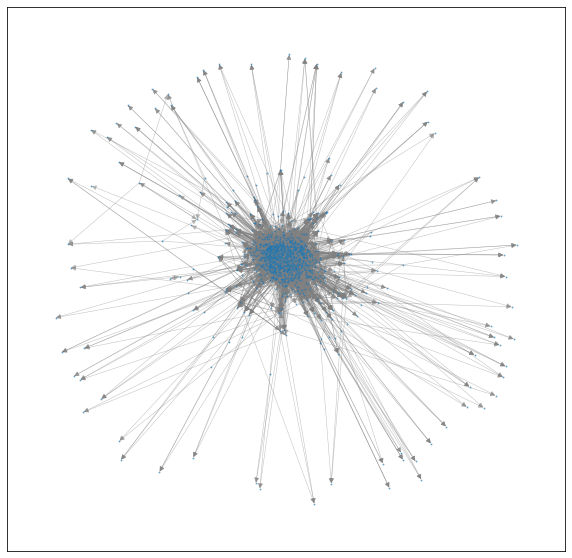

In [3]:
plt.figure(figsize=(10,10))
nx.draw_networkx(G, node_size=1, edge_color='grey', alpha=0.5, width=0.5, with_labels=False)
plt.show()

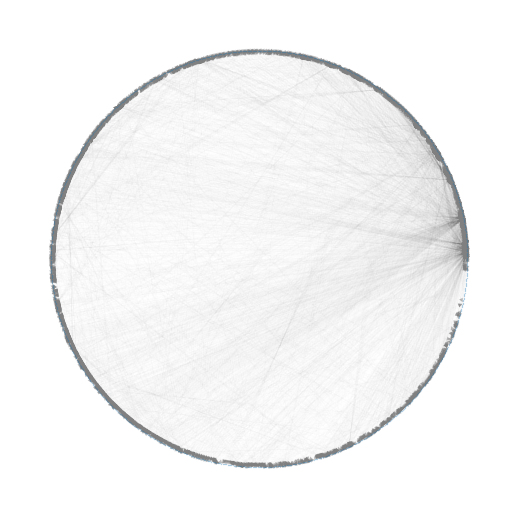

In [4]:
plt.figure(figsize=(7,7))
nx.draw_circular(G, node_shape='.', node_size=0.3, edge_color='grey', alpha=0.5, width=0.01)
plt.show()

## Caracterização

In [5]:
n = G.number_of_nodes()
m = G.number_of_edges()
print('Número de vértices:', n)
print('Número de arestas:', m)
print('Grafo direcionado?', nx.is_directed(G))
if not nx.is_directed(G):
    print('Grafo conexo?',nx.is_connected(G))

Número de vértices: 1039
Número de arestas: 5802
Grafo direcionado? True


### 1) Grau

In [6]:
in_degrees = np.array([val for (node, val) in G.in_degree()])
out_degrees = np.array([val for (node, val) in G.out_degree()])

In [7]:
from statistics import median
print('Máximo:', in_degrees.max())
print('Mínimo:', in_degrees.min())
print('Média:',in_degrees.mean())
print('Mediana:', median(in_degrees))
print('Desvio padrão:', in_degrees.std())


Máximo: 576
Mínimo: 0
Média: 5.584215591915303
Mediana: 3
Desvio padrão: 22.462253251005937


In [8]:
from statistics import median
print('Máximo:', out_degrees.max())
print('Mínimo:', out_degrees.min())
print('Média:',out_degrees.mean())
print('Mediana:', median(out_degrees))
print('Desvio padrão:', out_degrees.std())

Máximo: 399
Mínimo: 0
Média: 5.584215591915303
Mediana: 3
Desvio padrão: 19.119360180733132


#### Distribuição empírica

PMF:

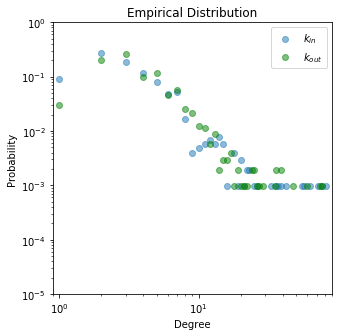

In [9]:
x_in, f_in = np.unique(in_degrees, return_counts=True)
x_out, f_out = np.unique(out_degrees, return_counts=True)
pmf_in = f_in/f_in.sum()
pmf_out = f_out/f_out.sum()

plt.figure(figsize=(5,5))
plt.scatter(x_in,pmf_in, alpha=0.5, label='$k_{in}$')
plt.scatter(x_out,pmf_out, alpha=0.5, c='g', label='$k_{out}$')
plt.title('Empirical Distribution')
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlim(9*10**-1, 9*10**1)
plt.ylim(10**-5, 10**0)
plt.show()

CCDF:

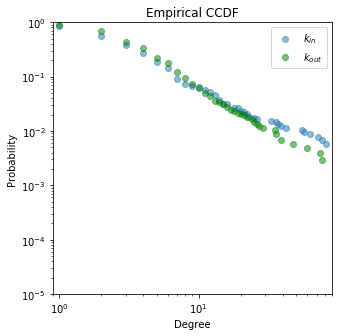

In [45]:
cdf_in = f_in.cumsum()/f_in.sum()
ccdf_in = 1-cdf_in

cdf_out = f_out.cumsum()/f_out.sum()
ccdf_out = 1-cdf_out


plt.figure(figsize=(5,5))
plt.title('Empirical CCDF')
plt.scatter(x_in,ccdf_in, alpha=0.5, label='$k_{in}$')
plt.scatter(x_out,ccdf_out, alpha=0.5, c='g', label='$k_{out}$')
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlim(9*10**-1, 9*10**1)
plt.ylim(10**-5, 10**0)
plt.show()

In [48]:
np.savetxt('vectors/metabolic-degree_in-ccdf.txt', [ccdf_in], delimiter=',', fmt='%f')
np.savetxt('vectors/metabolic-degree_in-x.txt', [x_in], delimiter=',', fmt='%d')
np.savetxt('vectors/metabolic-degree_out-ccdf.txt', [ccdf_out], delimiter=',', fmt='%f')
np.savetxt('vectors/metabolic-degree_out-x.txt', [x_out], delimiter=',', fmt='%d')

### 2) Distância 

Calculando a distância entre cada par de vértices:

In [11]:
length = dict(nx.all_pairs_shortest_path_length(G))

Exclui as distâncias entre o mesmo vértice (loop):

In [12]:
dist = np.array([])
for (p,dic) in length.items():
    try: 
        dic.pop(p)
    except:
        continue
    dist = np.append(dist, np.array(list(dic.values())))

Estatísticas básicas:

In [13]:
print('Máximo:', dist.max())
print('Mínimo:', dist.min())
print('Média:',dist.mean())
print('Mediana:', median(dist))
print('Desvio padrão:', dist.std())

Máximo: 8.0
Mínimo: 1.0
Média: 2.9754165710203444
Mediana: 3.0
Desvio padrão: 0.8266672701272522


Verificando o cálculo da distância média através do método disponibilizado pela biblioteca:

In [14]:
#d_mean = nx.average_shortest_path_length(G)
#print('Distância média:',d_mean)

PMF:

[1. 2. 3. 4. 5. 6. 7. 8.]
[  5802 257669 469012 161251  30978   7057    448     37]


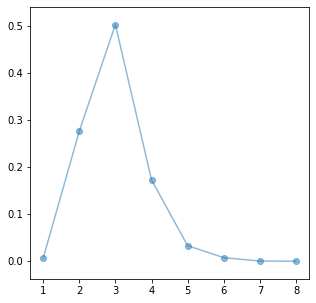

In [53]:
x, f_d = np.unique(dist, return_counts=True)
pmf = f_d/f_d.sum()

plt.figure(figsize=(5,5))
plt.title('Empirical CCDF')
plt.xlabel('Distance')
plt.ylabel('Probability')

plt.scatter(x,pmf,alpha=0.5)
plt.plot(x,pmf, alpha=0.5)
plt.show()

Frequência relativa e CCDF:

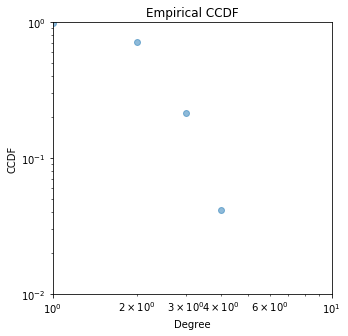

In [54]:
cdf = f_d.cumsum()/f_d.sum()
ccdf = 1-cdf

plt.figure(figsize=(5,5))
plt.scatter(x,ccdf,alpha=0.5)
plt.title('Empirical CCDF')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('CCDF')

plt.ylim(10**-2, 10**0)
plt.xlim(10**0, 10**1)
plt.show()

In [55]:
np.savetxt('vectors/metabolic-dist-x.txt', [x], delimiter=',', fmt='%d')
np.savetxt('vectors/metabolic-dist-pmf.txt', [pmf], delimiter=',', fmt='%f')
np.savetxt('vectors/metabolic-dist-ccdf.txt', [ccdf], delimiter=',', fmt='%f')

### 3) Tamanho das componentes conexas

Tamanho das componentes:

In [17]:
#[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

### 4) Clusterização

#### 4.1) Clusterização Local

In [18]:
cluster = np.array(list(nx.clustering(G).values()))
print('Máximo:', cluster.max())
print('Mínimo:', cluster.min())
print('Média:', cluster.mean())
print('Mediana:', median(cluster))
print('Desvio padrão:', cluster.std())

Máximo: 1.0
Mínimo: 0.0
Média: 0.2805614184844428
Mediana: 0.25
Desvio padrão: 0.2133271221279829


Verificando a clusterização média:

In [19]:
nx.average_clustering(G)

0.28056141848444327

PMF:

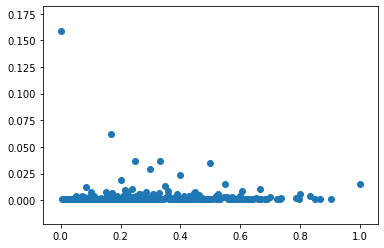

In [20]:
x, f = np.unique(cluster, return_counts=True)
pmf = f/f.sum()
plt.scatter(x,pmf)
plt.show()

CCDF:

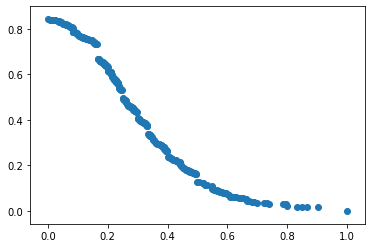

In [21]:
x, f = np.unique(cluster, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf

plt.scatter(x,ccdf)
plt.show()

#### 4.2) Clusterização global

Clusterização global:

In [23]:
nx.transitivity(G)

0.032475074064231654

### 5) Centralidade

#### 5.1) Centralidade de Grau

In [24]:
cent = np.array(list(nx.degree_centrality(G).values()))
print('Máximo:', cent.max())
print('Mínimo:', cent.min())
print('Média:', cent.mean())
print('Mediana:', median(cent))
print('Desvio padrão:', cent.std())

Máximo: 0.8728323699421965
Mínimo: 0.0009633911368015414
Média: 0.010759567614480353
Mediana: 0.005780346820809248
Desvio padrão: 0.03622679732753081


CCDF:

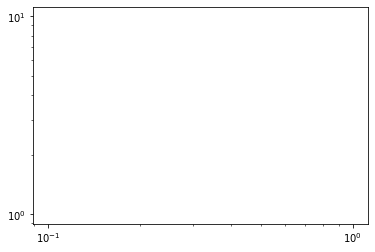

In [25]:
x, f = np.unique(cent, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf)
plt.xscale('log')
plt.yscale('log')
plt.show()

#### 5.2) Betweeness

In [26]:
btw = np.array(list(nx.betweenness_centrality(G).values()))
print('Máximo:', btw.max())
print('Mínimo:', btw.min())
print('Média:', btw.mean())
print('Mediana:', median(btw))
print('Desvio padrão:', btw.std())

Máximo: 0.49973508133874395
Mínimo: 0.0
Média: 0.0016466499699959532
Mediana: 6.803357286353484e-05
Desvio padrão: 0.017875393965037904


PMF:

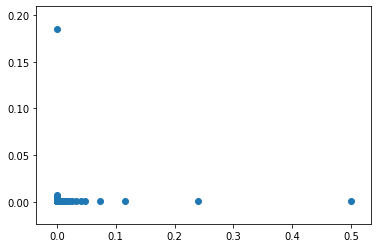

In [27]:
x, f = np.unique(btw, return_counts=True)
pmf = f/f.sum()
plt.scatter(x,pmf)
plt.show()

CCDF:

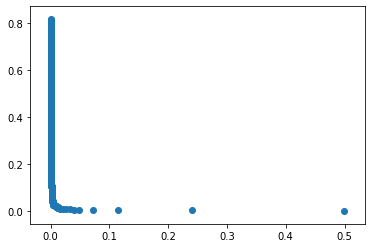

In [28]:
x, f = np.unique(btw, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf)
plt.show()

Visualziação do Betweenes:

In [29]:
#nx.draw_circular(G, node_color=btw, cmap=plt.cm.Blues, with_labels=True)

#### 5.3) Closeness

In [30]:
close = np.array(list(nx.closeness_centrality(G).values()))
print('Máximo:', close.max())
print('Mínimo:', close.min())
print('Média:', close.mean())
print('Mediana:', median(close))
print('Desvio padrão:', close.std())

Máximo: 0.6489724058737077
Mínimo: 0.0
Média: 0.30094746011727913
Mediana: 0.3074661500580135
Desvio padrão: 0.10150676496047041


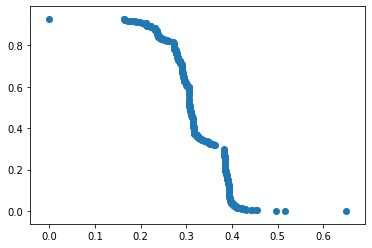

In [31]:
x, f = np.unique(close, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf)
plt.show()

In [32]:
#nx.draw_circular(G, node_color=close, cmap=plt.cm.Blues, with_labels=True)

#### 5.4) Auto-Vetor

In [33]:
ev = np.array(list(nx.eigenvector_centrality(G).values()))
print('Máximo:', ev.max())
print('Mínimo:', ev.min())
print('Média:', ev.mean())
print('Mediana:', median(ev))
print('Desvio padrão:', ev.std())

Máximo: 0.5231326023908972
Mínimo: 4.8928363339452595e-30
Média: 0.0163702309216031
Mediana: 0.008784083271067836
Desvio padrão: 0.026352977956520487


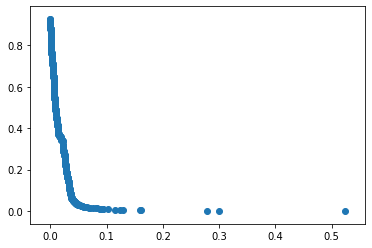

In [34]:
x, f = np.unique(ev, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf)
plt.show()

#### 5.6) PageRank

In [36]:
pr = np.array(list(nx.pagerank(G, alpha=0.9).values()))
print('Máximo:', pr.max())
print('Mínimo:', pr.min())
print('Média:', pr.mean())
print('Mediana:', median(pr))
print('Desvio padrão:', pr.std())

Máximo: 0.07741274640425097
Mínimo: 0.0001156842178279783
Média: 0.000962463907603465
Mediana: 0.0004409075581467728
Desvio padrão: 0.0032880068979534906


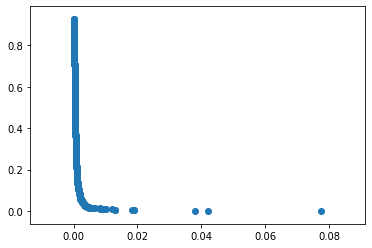

In [37]:
x, f = np.unique(pr, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf)
#plt.xscale('log')
#plt.yscale('log')
plt.show()

### 5) Similaridade

#### 5.1) Jaccard

Não implementado para grafos direcionados.

#### 5.2) Adamic/Adar

Não implimentado para grafos direcionados.